In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib notebook


C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [27]:
def boll_plots(tickername, date, att, window_size):
    df = pdr.get_data_yahoo(tickername, date)
    
    avg_name = str(window_size) + 'd mavg'
    std_name = str(window_size) + 'd std'
    
    df[avg_name] = df[att].rolling(window=window_size).mean()
    df[std_name] = df[att].rolling(window=window_size).std()

    df['Upper Band'] = df[avg_name] + (df[std_name] * 2)
    df['Lower Band'] = df[avg_name] - (df[std_name] * 2)
    
    
    cols = [avg_name,'Upper Band','Lower Band', att]    
    df_Boll = df[cols]
    
    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(111)

    # Get index values for the X axis for the DataFrame
    x_axis = df_Boll.index.get_level_values(0)

    # Plot shaded 'win' Day Bollinger Band for Facebook
    ax.fill_between(x_axis, 
                    df_Boll['Upper Band'], 
                    df_Boll['Lower Band'], 
                    color='grey')

    ax.plot(x_axis, df_Boll[att], color='blue', lw=2)
    ax.plot(x_axis, df_Boll[avg_name], color='black', lw=2)

    # Set Title & Show the Image
    ax.set_title('2019-2020 Bollinger Band for ' + tickername)
    ax.set_xlabel('Dates')
    ax.set_ylabel('Price (USD)')
    
    ax2 = ax.twinx()
    
    color = 'tab:red'
    ax2.set_ylabel('Volume', color=color)
    ax2.bar(x_axis, df["Volume"].rolling(window=window_size).mean(), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.show();


<IPython.core.display.Javascript object>


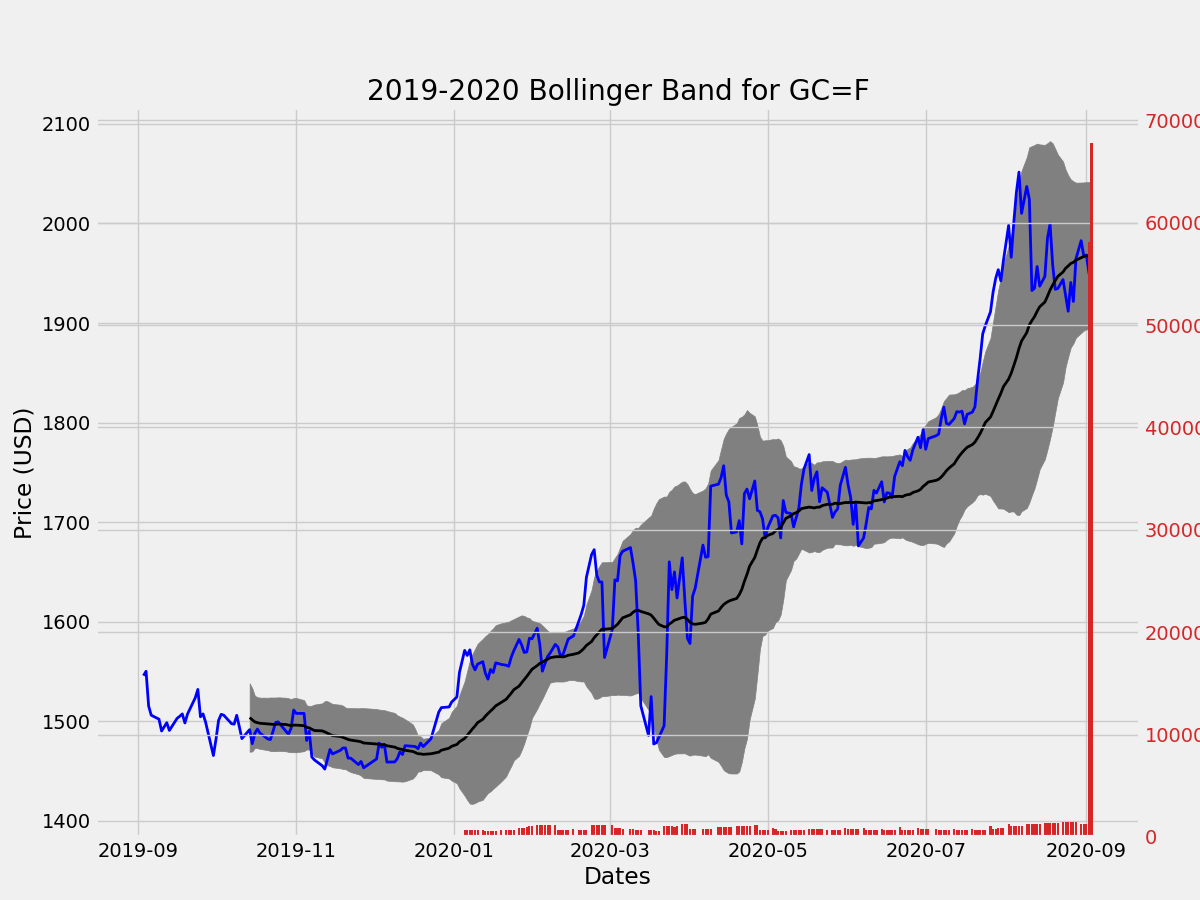

In [28]:
boll_plots('GC=F', '2019-09-01', 'Close', 30)

In [21]:
boll_plots('TSLA', '2019-09-01', 'Close', 30)

<IPython.core.display.Javascript object>